### 활성화 함수
* step function : 음수면 0, 양수면 1
* sigmoid : 0과 1 사이의 값으로 표현
* tanh
* relu : 0 이하면 0, 그 이상이면 비례해서 증가
* leakyrelu
* ...

In [34]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import keras
import sys

In [35]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [36]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))

model.add(Dense(units=10, activation='softmax'))

### 손실함수(loss function), 최적화 알고리즘 선택

In [37]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [38]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [39]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [41]:
### 모델 학습
hist=model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0064 - accuracy: 0.6967
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6871 - accuracy: 0.7828
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6711 - accuracy: 0.7837
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6684 - accuracy: 0.7806
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6359 - accuracy: 0.7942
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6275 - accuracy: 0.7978
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5753 - accuracy: 0.8137
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5421 - accuracy: 0.8259
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5265 - accuracy: 0.8310
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.542

In [42]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [43]:
import matplotlib.pyplot as plt

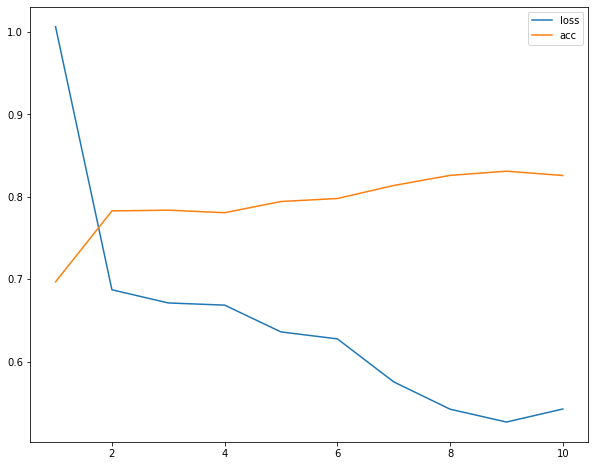

In [44]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [45]:
loss_and_metrics=model.evaluate(X_test, y_test, batch_size=32)
print(loss_and_metrics)

313/313 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.8278
[0.5276676416397095, 0.8277999758720398]


### 딥러닝 학습 조기 종료 함수

In [46]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_train=X_train[:50000]
y_train=y_train[:50000]
X_val=X_train[50000:]
y_val=y_train[50000:]

In [47]:
X_train=X_train.reshape(50000,784).astype('float32')/255.0
X_val=X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

ValueError: cannot reshape array of size 0 into shape (10000,784)

In [49]:
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

IndexError: index 48087 is out of bounds for axis 0 with size 10000

In [50]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

ValueError: zero-size array to reduction operation maximum which has no identity

In [51]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [52]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [53]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=20)
hist = model.fit(X_train, y_train, epochs=3000, batch_size=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

flow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0281e-04 - accuracy: 1.0000
Epoch 651/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0263e-04 - accuracy: 1.0000
Epoch 652/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0240e-04 - accuracy: 1.0000
Epoch 653/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0222e-04 - accuracy: 1.0000
Epoch 654/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0200e-04 - accuracy: 1.0000
Epoch 655/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0183e-04 - accuracy: 1.0000
Epoch 656/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0160e-04 - accuracy: 1.0000
Epoch 657/3000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0142e-04 - accuracy: 1.0000
Epoch 658/3000
1000/1

KeyboardInterrupt: 